### Applying K means clustering algorithm on learning optimum discount ratio. 

### We suspected great deal of change in mean discount ratio when the combinations of promo1 or prmo2 was activated or not.

### Since K-means algorithm is a centroid based clustering method, we would expect the centriods of each clusters to be the respective optimum ratio of each clusters.(Ideally the most right centriod)

### Each clusters give us the information of where the promo1 or promo2 has influence on the sales with respect to it's discount ratio. 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('sales.txt', delimiter = ';')

In [3]:
#When promo1 and promo2 true
dataset_p1p2_t = dataset[(dataset['promo1']==1)&(dataset['promo2']==1)]
dataset_p1p2_t.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,103.000000,103.000000,103.000000,103.000000,103.0,103.0
mean,106.883495,57.804369,41.396602,0.701770,1.0,1.0
std,147.692135,44.217690,34.637543,0.139955,0.0,0.0
min,2.000000,3.950000,2.950000,0.369925,1.0,1.0
25%,14.500000,26.950000,16.450000,0.609020,1.0,1.0
50%,42.000000,41.950000,29.950000,0.720383,1.0,1.0
75%,119.500000,81.450000,55.450000,0.800688,1.0,1.0
max,599.000000,195.950000,167.950000,1.000000,1.0,1.0


In [4]:
#When only promo1 is true
dataset_p1_t = dataset[(dataset['promo1']==1)&(dataset['promo2']==0)]
dataset_p1_t.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,5193.000000,5193.000000,5193.000000,5193.000000,5193.0,5193.0
mean,91.376083,52.517880,34.131398,0.654457,1.0,0.0
std,125.672824,35.357007,25.180661,0.160156,0.0,0.0
min,1.000000,3.950000,1.950000,0.298246,1.0,0.0
25%,17.000000,25.950000,15.950000,0.542203,1.0,0.0
50%,45.000000,40.950000,25.950000,0.659618,1.0,0.0
75%,109.000000,79.950000,47.950000,0.764359,1.0,0.0
max,891.000000,197.950000,195.950000,1.000000,1.0,0.0


In [5]:
#when only promo2 is true 
dataset_p2_t = dataset[(dataset['promo1']==0)&(dataset['promo2']==1)]
dataset_p2_t.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,309.000000,309.000000,309.000000,309.000000,309.0,309.0
mean,57.407767,57.804369,33.610194,0.594042,0.0,1.0
std,115.858997,44.073892,29.298803,0.212071,0.0,0.0
min,1.000000,3.950000,1.950000,0.298246,0.0,1.0
25%,7.000000,26.950000,11.950000,0.358151,0.0,1.0
50%,20.000000,41.950000,23.950000,0.628942,0.0,1.0
75%,58.000000,88.950000,45.950000,0.757264,0.0,1.0
max,892.000000,195.950000,171.950000,1.000000,0.0,1.0


In [6]:
#When there is no promotions 
dataset_p1p2_f = dataset[(dataset['promo1']==0)&(dataset['promo2']==0)]
dataset_p1p2_f.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,75821.000000,75821.000000,75821.000000,75821.000000,75821.0,75821.0
mean,54.628098,52.599569,27.922184,0.536515,0.0,0.0
std,84.599444,35.509502,22.411545,0.192286,0.0,0.0
min,1.000000,3.950000,1.950000,0.296482,0.0,0.0
25%,10.000000,25.950000,11.950000,0.351032,0.0,0.0
50%,26.000000,40.950000,20.950000,0.509704,0.0,0.0
75%,63.000000,79.950000,37.950000,0.687011,0.0,0.0
max,898.000000,197.950000,197.950000,1.000000,0.0,0.0


## Checking the optimum discount ratio based on whether promotions are true or not

### Check for promo1, promo2 true

In [7]:
#2, 5 are columns index for attributes sales and ratio respectively.
#From this cell onwards, to check to the optimum discount ratio of various combinations of promotions , all you need to do is pass the respective dataset_(  )
X = dataset_p1p2_t.iloc[:, [2, 5]].values

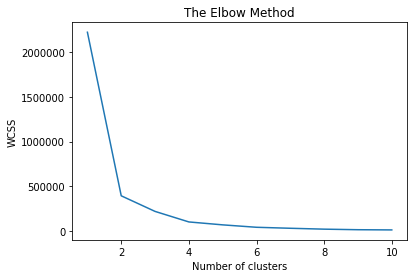

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

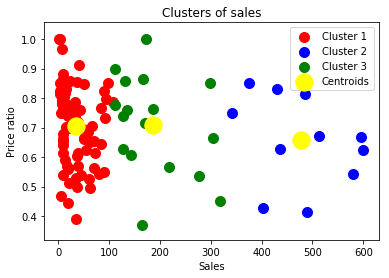

In [9]:
#In this step, depending upon the sharp cutoff of the curve, you would need to change the number of clusters.
#Replicate scatter plot methods depending upon number of clusters spotted. 

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('Sales')
plt.ylabel('Price ratio')
plt.legend()
plt.show()

## We can see that promo1 and promo2 has three clusters with optimal price ratio of slightly above 0.4 ratio, meaning 60% discount on the most right cluster, and 55% discount on middle cluster and 45% discount on the most left cluster. 
## Top right clusters are the records where promo1 or promo2 are true and there was no big discount and yet they sold highest. We can extract these records using simple numpy selction methods. 


### check for only promo1 true 

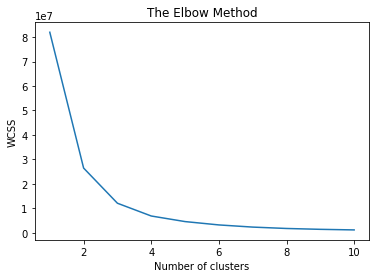

In [10]:
X = dataset_p1_t.iloc[:, [2, 5]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

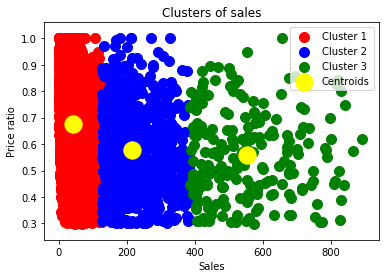

In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('Sales')
plt.ylabel('Price ratio')
plt.legend()
plt.show()

#### check for only promo2 true value

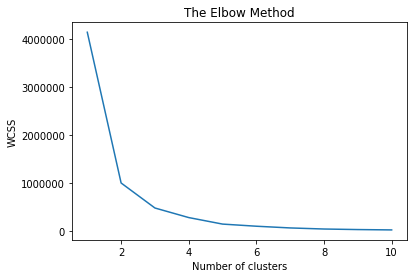

In [12]:
X = dataset_p2_t.iloc[:, [2, 5]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

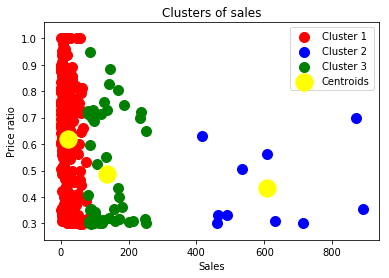

In [52]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('Sales')
plt.ylabel('Price ratio')
plt.legend()
plt.show()

#### Check for when there is no promotions

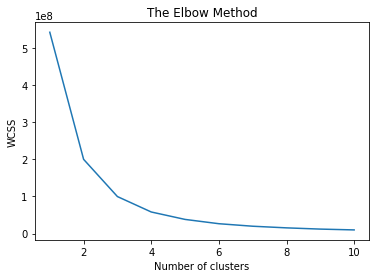

In [53]:
X = dataset_p1p2_f.iloc[:, [2, 5]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

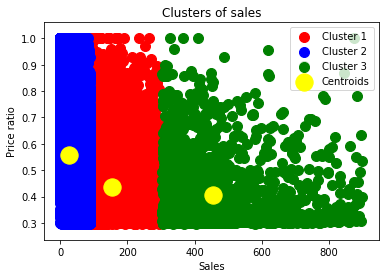

In [54]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('Sales')
plt.ylabel('Price ratio')
plt.legend()
plt.show()

## Results:  

We can select the most right centroids for the optimal ratio of sales in each sections.

We can select the top right clusters for determining whether the promotions has effect on it's sales or not.
